In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
# Send a request to the website
url = "https://companiesmarketcap.com/tesla/revenue/#google_vignette"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
table = soup.find('table')

# Parse the table into a pandas DataFrame
df = pd.read_html(str(table))[0]

# Display the last five rows
print(df.tail())

    Year  Revenue   Change
11  2013  $2.01 B  387.23%
12  2012  $0.41 B  102.34%
13  2011  $0.20 B   74.95%
14  2010  $0.11 B    4.29%
15  2009  $0.11 B      NaN


<ipython-input-8-26fd3b2bd6a7>:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [ ]:
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period="max")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data)

In [ ]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text

    # Instead of append, use pd.concat to add a new row
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [Revenue]})], ignore_index=True)

    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True) # Use regex=True for replace


gme_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


In [ ]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


[*********************100%***********************]  1 of 1 completed


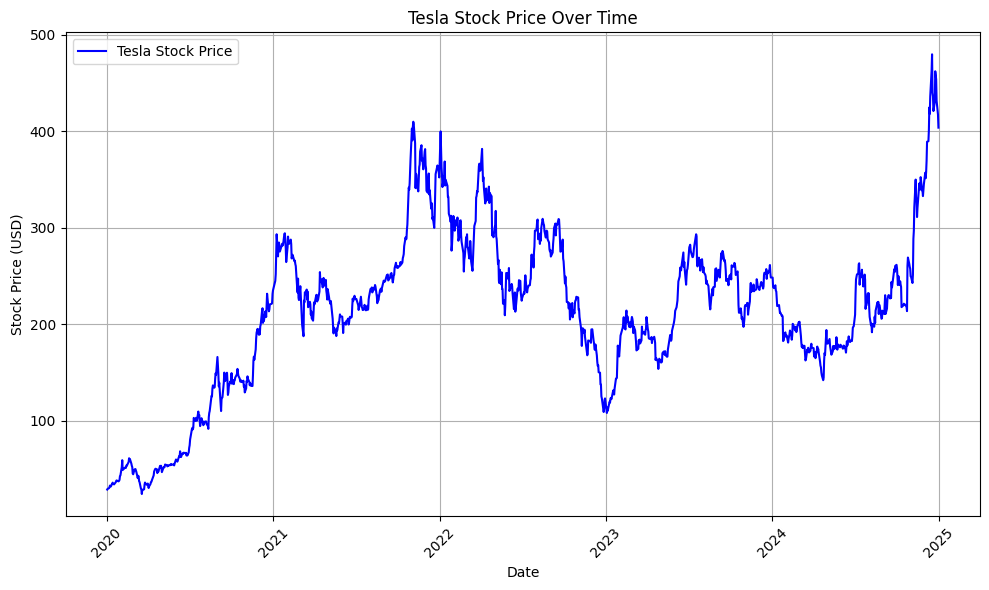

In [27]:
# Import required libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data using yfinance
tesla_data = yf.download('TSLA', start='2020-01-01', end='2025-01-01')

# Plot the Tesla stock data
plt.figure(figsize=(10, 6))
plt.plot(tesla_data.index, tesla_data['Close'], label='Tesla Stock Price', color='blue')

# Adding title and labels
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')

# Display the graph
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed


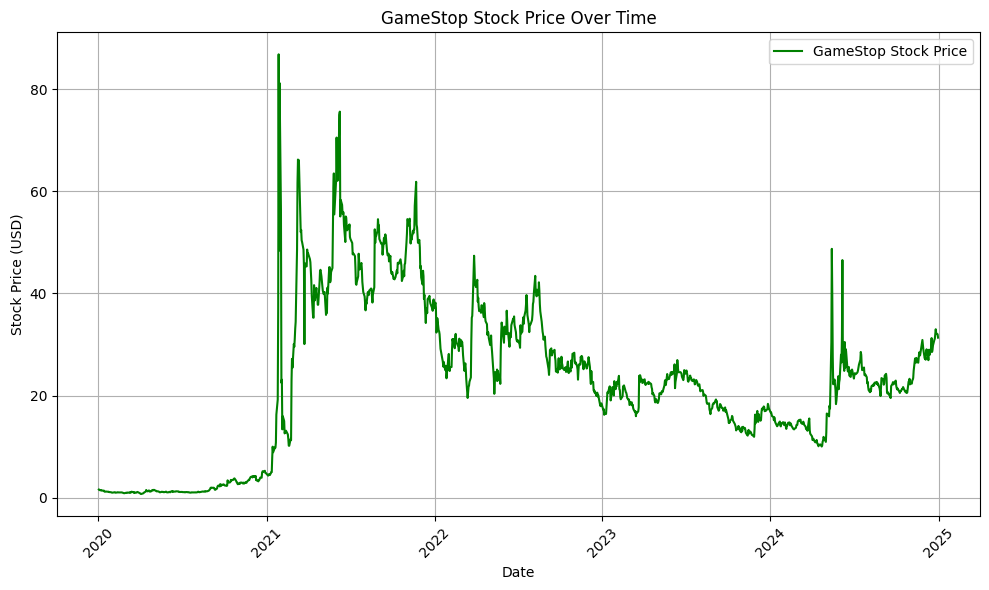

In [28]:
# Import required libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch GameStop stock data using yfinance
gamestop_data = yf.download('GME', start='2020-01-01', end='2025-01-01')

# Plot the GameStop stock data
plt.figure(figsize=(10, 6))
plt.plot(gamestop_data.index, gamestop_data['Close'], label='GameStop Stock Price', color='green')

# Adding title and labels
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')

# Display the graph
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()